In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os 
from astropy import units as u
import sys
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

In [51]:
hdu = fits.open('/Users/quinncasey/Desktop/research/eboss/spLine_trim_dr16_eboss.fits')

In [4]:
H_ALPHA_FLUX = hdu[1].data['H_ALPHA_FLUX'].tolist()
H_ALPHA_FLUX_ERR = hdu[1].data['H_ALPHA_FLUX_ERR'].tolist()
H_BETA_FLUX = hdu[1].data['H_BETA_FLUX'].tolist()
H_BETA_FLUX_ERR = hdu[1].data['H_BETA_FLUX_ERR'].tolist()
NII_6584_FLUX = hdu[1].data['NII_6584_FLUX'].tolist()
NII_6584_FLUX_ERR = hdu[1].data['NII_6584_FLUX_ERR'].tolist()
OII_3727_FLUX = hdu[1].data['OII_3727_FLUX'].tolist()
OII_3727_FLUX_ERR = hdu[1].data['OII_3727_FLUX_ERR'].tolist()
OIII_5007_FLUX = hdu[1].data['OIII_5007_FLUX'].tolist()
OIII_5007_FLUX_ERR = hdu[1].data['OIII_5007_FLUX_ERR'].tolist()

Z = hdu[1].data['Z'].tolist()

In [5]:
data_names = ['H_ALPHA_FLUX', 'H_ALPHA_FLUX_ERR', 'H_BETA_FLUX', 'H_BETA_FLUX_ERR', 'NII_6584_FLUX', 'NII_6584_FLUX_ERR', 'OIII_5007_FLUX', 'OIII_5007_FLUX_ERR', 'OII_3727_FLUX', 'OII_3727_FLUX_ERR', 'Z'] 
data_dict = {'H_ALPHA_FLUX' : H_ALPHA_FLUX, 'H_ALPHA_FLUX_ERR' : H_ALPHA_FLUX_ERR, 'H_BETA_FLUX' : H_BETA_FLUX, 'H_BETA_FLUX_ERR' : H_BETA_FLUX_ERR, 'NII_6584_FLUX' : NII_6584_FLUX,  'NII_6584_FLUX_ERR' : NII_6584_FLUX_ERR, 'OIII_5007_FLUX' : OIII_5007_FLUX, 'OIII_5007_FLUX_ERR' : OIII_5007_FLUX_ERR, 'OII_3727_FLUX':OII_3727_FLUX, 'OII_3727_FLUX_ERR':OII_3727_FLUX_ERR, 'Z':Z}
df = pd.DataFrame(data_dict)

In [6]:
for name in data_names: 
    df = df.loc[df[name].notnull()]

In [7]:
# Making SNR cuts
df = df.loc[(df['NII_6584_FLUX']/df['NII_6584_FLUX_ERR']) > 3]
df = df.loc[(df['H_ALPHA_FLUX']/df['H_ALPHA_FLUX_ERR']) > 3]
df = df.loc[(df['H_BETA_FLUX']/df['H_BETA_FLUX_ERR']) > 3]
df = df.loc[(df['OIII_5007_FLUX']/df['OIII_5007_FLUX_ERR']) > 3]
df = df.loc[(df['OII_3727_FLUX']/df['OII_3727_FLUX_ERR']) > 3]

df1 = df.query('Z > 0.1 & Z <=0.2')

In [8]:
df1

,H_ALPHA_FLUX,H_ALPHA_FLUX_ERR,H_BETA_FLUX,H_BETA_FLUX_ERR,NII_6584_FLUX,NII_6584_FLUX_ERR,OIII_5007_FLUX,OIII_5007_FLUX_ERR,OII_3727_FLUX,OII_3727_FLUX_ERR,Z
32,361.902130,6.575371,87.052773,2.273923,118.281067,3.198118,96.730667,2.161498,204.694687,3.752417,0.105281
72,71.619888,1.746683,22.257740,1.190700,2.585195,0.858081,104.004333,1.844970,52.847717,1.762716,0.199954
108,91.511169,2.003538,16.944899,1.187491,27.282827,2.096210,14.159435,1.204987,34.092461,2.451308,0.105692
175,55.245682,1.222163,16.339369,0.804314,4.694409,0.552655,46.889687,1.068646,46.592781,1.794244,0.131985
266,524.339722,8.071745,132.595428,2.842736,157.718536,3.558419,166.473419,2.980740,304.371552,4.660732,0.105160
...,...,...,...,...,...,...,...,...,...,...,...
1886183,43.346359,1.362117,13.532630,0.984515,3.704603,0.766523,48.445332,1.861789,34.148190,1.944120,0.112364
1897489,13.890966,1.386438,3.915086,1.183270,2.787330,0.901945,4.328385,1.349987,8.947477,1.849116,0.185585
1897902,48.708511,1.122954,14.992145,0.889941,1.827003,0.532531,99.319557,1.519871,22.740940,1.493842,0.132279
1905567,10.558468,1.143505,4.449336,1.143337,4.384293,1.147266,7.683566,1.670206,10.072718,2.110671,0.179970


In [9]:
def k(lamb):
    klam = -4.12 + (2.56/(lamb)) + (-0.152/(lamb**2)) + (0.0104/(lamb**3)) + 2.93
    return klam

In [14]:
EBV = (2.5/(k(4862.691)-k(6564.632)))*np.log10 ((df1['H_ALPHA_FLUX']/df1['H_BETA_FLUX'])/2.86)
print(len(EBV))

11000


In [16]:
df1['EBV'] = EBV
df1

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,H_ALPHA_FLUX,H_ALPHA_FLUX_ERR,H_BETA_FLUX,H_BETA_FLUX_ERR,NII_6584_FLUX,NII_6584_FLUX_ERR,OIII_5007_FLUX,OIII_5007_FLUX_ERR,OII_3727_FLUX,OII_3727_FLUX_ERR,Z,EBV
32,361.902130,6.575371,87.052773,2.273923,118.281067,3.198118,96.730667,2.161498,204.694687,3.752417,0.105281,2975.442032
72,71.619888,1.746683,22.257740,1.190700,2.585195,0.858081,104.004333,1.844970,52.847717,1.762716,0.199954,937.578443
108,91.511169,2.003538,16.944899,1.187491,27.282827,2.096210,14.159435,1.204987,34.092461,2.451308,0.105692,5056.728400
175,55.245682,1.222163,16.339369,0.804314,4.694409,0.552655,46.889687,1.068646,46.592781,1.794244,0.131985,1331.583761
266,524.339722,8.071745,132.595428,2.842736,157.718536,3.558419,166.473419,2.980740,304.371552,4.660732,0.105160,2577.519897
...,...,...,...,...,...,...,...,...,...,...,...,...
1886183,43.346359,1.362117,13.532630,0.984515,3.704603,0.766523,48.445332,1.861789,34.148190,1.944120,0.112364,901.271527
1897489,13.890966,1.386438,3.915086,1.183270,2.787330,0.901945,4.328385,1.349987,8.947477,1.849116,0.185585,1714.920885
1897902,48.708511,1.122954,14.992145,0.889941,1.827003,0.532531,99.319557,1.519871,22.740940,1.493842,0.132279,1014.299135
1905567,10.558468,1.143505,4.449336,1.143337,4.384293,1.147266,7.683566,1.670206,10.072718,2.110671,0.179970,-1484.773642


In [17]:
def DC(Lobs,k,EBV):
    Lint=Lobs*(10**(0.4*k*EBV))
    return Lint

def correct(line,lams,EBV):
    cl=DC(line,k(lams),EBV)
    return cl

In [18]:
lams2 = {'Ly_alpha':1215.24,
        'NV_1240':1240,
        'CIV_1550':1550,
        'HeII_1640':1640,
        'CIII_1909':1909,
        'MgII_2800':2800,
        'OII_3727':3727,
        'NeIII_3869':3869,
        'H_epsilon':3971,
        'H_gamma':4341.68,
        'OIII_4363':4363,
        'H_beta':4862.68,
        'OIII_4959':4959,
        'OIII_5007':5007,
        'H_alpha':6564.61,
        'NII_6584':6584,
        'SII_6717':6717}

In [43]:
ha = (df1['H_ALPHA_FLUX'])*(10**(0.4*k(lams2['H_alpha'])*df1['EBV']))
hb = (df1['H_BETA_FLUX'])*(10**(0.4*k(lams2['H_beta'])*df1['EBV']))
n2 = (df1['NII_6584_FLUX'])*(10**(0.4*k(lams2['NII_6584'])*df1['EBV']))
o3 = (df1['OIII_5007_FLUX'])*(10**(0.4*k(lams2['OIII_5007'])*df1['EBV']))
o2 = (df1['OII_3727_FLUX'])*(10**(0.4*k(lams2['OII_3727'])*df1['EBV']))

In [52]:
def groves_1():
    x = np.linspace(-2, 2, 500)
    y = 2.1*x + 0.85
    return [x, y]

def groves_2():
    x = np.linspace(-2, 2, 500)
    y = -1.2*x - 0.7
    return [x, y]

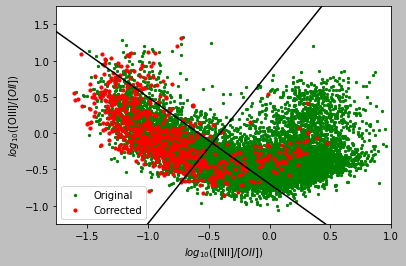

In [55]:
plt.style.use('grayscale')
x = np.log10(n2/o2)
y = np.log10(o3/o2)

x2 = np.log10(df1['NII_6584_FLUX']/df1['OII_3727_FLUX'])
y2 = np.log10(df1['OIII_5007_FLUX']/df1['OII_3727_FLUX'])

plt.plot(groves_1()[0], groves_1()[1], c='black')
plt.plot(groves_2()[0], groves_2()[1], c='black')

plt.xlim(-1.75,1.0)
plt.ylim(-1.25,1.75)

reg = plt.scatter(x2, y2, c='g', s=5)
cor = plt.scatter(x, y, c='r', s=10)

plt.xlabel(r'$log_{10}($[NII]/$[OII])$')
plt.ylabel(r'$log_{10}($[OIII]/$[OII])$')

plt.legend((reg, cor), ('Original', 'Corrected'))

plt.show()